In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Install dependencies
!pip install simpletransformers
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
import pandas as pd
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Load training dataset

import pandas as pd

# Load the training dataset
file_path = '/content/drive/MyDrive/meme_classifications/ocr_text/train/STask_B_train.csv'
combined_df = pd.read_csv(file_path)

# Check the structure
print("Training Data:")
print(combined_df.head())

# Convert label column to int if it's not already
combined_df['label'] = combined_df['label'].astype(int)

# Print label distribution
print("Label distribution:")
print(combined_df['label'].value_counts())




Training Data:
       index                                               text  label
0  10016.png   cope mald seeth p trans rights made with mematic    0.0
1  10017.png  restrict access to birth control overturning r...    3.0
2  10024.png  09 54 1 search 30 mins people are condemning t...    2.0
3  10027.png  milliebobbybrown 2h i just stole this car from...    2.0
4  10030.png          me trying to live my life lgbt propaganda    2.0
Label distribution:
label
2    931
0    617
3    238
1    199
Name: count, dtype: int64


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Load the dataset (replace 'data.csv' with your actual dataset file)
data = combined_df

# Preprocess the text data
max_words = 1000  # Maximum number of words to keep in the vocabulary
max_sequence_length = 100  # Maximum length of each text sequence

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])

sequences = tokenizer.texts_to_sequences(data['text'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Pad sequences to have the same length
data_padded = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the data into training and testing sets
labels = data['label'].values

# Convert labels to one-hot encoded format
one_hot_labels = pd.get_dummies(labels)

train_data, test_data, train_labels, test_labels = train_test_split(
    data_padded, one_hot_labels, test_size=0.2, random_state=42
)

# Build the ANN model
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Three neurons for three classes

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
              metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_accuracy}")

Found 12830 unique tokens.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4287 - loss: 1.2571
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4893 - loss: 1.1698
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5195 - loss: 1.1019
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7309 - loss: 0.8260
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8841 - loss: 0.4479
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.2304
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9883 - loss: 0.1239
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9885 - loss: 0.0731
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9944 - loss: 0.0500
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9954 - loss: 0.0373
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4431 - loss: 1.7219
Test accuracy: 0.44836270809173584


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get model predictions
predictions = model.predict(test_data)

# Convert probabilities to class indices
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels.values, axis=1)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Accuracy: 0.44836272040302266
Precision: 0.3539394511854359
Recall: 0.30400060931975825
F1 Score: 0.3105695287097726


In [ ]:
# Load and preprocess evaluation dataset
eval_path = '/content/drive/MyDrive/ocr_text/eval/Stask-B(index , text)val.csv'
eval_df = pd.read_csv(eval_path)
eval_df['text'] = eval_df['text'].map(preprocess)

# Predict
eval_preds, raw_outputs = model.predict(eval_df['text'].tolist())
eval_df['label'] = eval_preds

# Sanity check
print(eval_df.head())


In [ ]:
import json

# Save to JSON lines file
submission_path = '/content/drive/MyDrive/submission.json'
with open(submission_path, 'w') as f:
    for _, row in eval_df.iterrows():
        f.write(json.dumps({"index": row['index'], "prediction": int(row['label'])}) + "\n")

print(f"Submission saved to {submission_path}")


In [11]:
#import libraries for generating report
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#Import Pandas
import pandas as pd
#Import numpy
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
!pip install simpletransformers

In [15]:
from simpletransformers.classification import ClassificationModel

model1=ClassificationModel('albert','albert-base-v1',num_labels=4,use_cuda=False,args={
        "reprocess_input_data" : True,
        "use_cached_eval_features":False,
        "overwrite_output_dir": True,
        "num_train_epochs": 3 }) #Increase for better performance

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    rem_tag = re.sub(r'@\S+', '',rem_num)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_tag)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    return " ".join(filtered_words)

combined_df['text']=combined_df['text'].map(lambda s:preprocess(s))


In [21]:
from sklearn.preprocessing import LabelEncoder

# Rename columns
train_df = train_df.rename(columns={'text': 'text', 'label': 'labels'})
test_df = test_df.rename(columns={'text': 'text', 'label': 'labels'})

# Encode string labels to integers
label_encoder = LabelEncoder()
train_df['labels'] = label_encoder.fit_transform(train_df['labels'])
test_df['labels'] = label_encoder.transform(test_df['labels'])  # use same encoder

# train_df = train_df.sort_values(by='labels').reset_index(drop=True) to sort in proper orderr

# Double-check
print(train_df.head())
print(train_df['labels'].unique())  # should show ints like [0, 1, 2, 3]


       index                                               text  labels
0  15280.png  year old white sports fans watching critical r...       0
1  11084.png  parents arguing whether gay straight thinks pa...       0
2  17515.png  people scramming gun rights free speach people...       0
3  19720.png  natural many genders documentary jake tran vie...       0
4  11978.png  donated lgbtq charities transphobic rist lol p...       0
[0 1 2 3]


In [22]:
model1.train_model(train_df)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/199 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/199 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/199 [00:00<?, ?it/s]

(597, 1.2320711923204675)

In [23]:
file_path = '/content/drive/MyDrive/meme_classifications/ocr_text/eval/STask-B(index,text)val.csv'
testdf = pd.read_csv(file_path)


In [24]:
testdf['text']=testdf['text'].map(lambda s:preprocess(s))
predictions_test, raw_outputs = model1.predict(testdf['text'].tolist())
print(predictions_test)

0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [25]:
predictions_test, raw_outputs = model1.predict(test_df['text'].tolist())
print(predictions_test)

0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [26]:
test_df['predictions'] = predictions_test

In [29]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have a DataFrame named test_df with columns: 'text', 'label', and 'predictions'
y_true = test_df['labels'].values
y_pred = test_df['predictions'].values

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1','Class 2' , 'Class 3'], digits=4)

# Extract precision, recall, and F1 score from the classification report
lines = report.split('\n')
precision = float(lines[-2].split()[2])
recall = float(lines[-2].split()[3])
f1_score = float(lines[-2].split()[4])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.4987405541561713
Precision: 0.2487
Recall: 0.4987
F1 Score: 0.3319


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


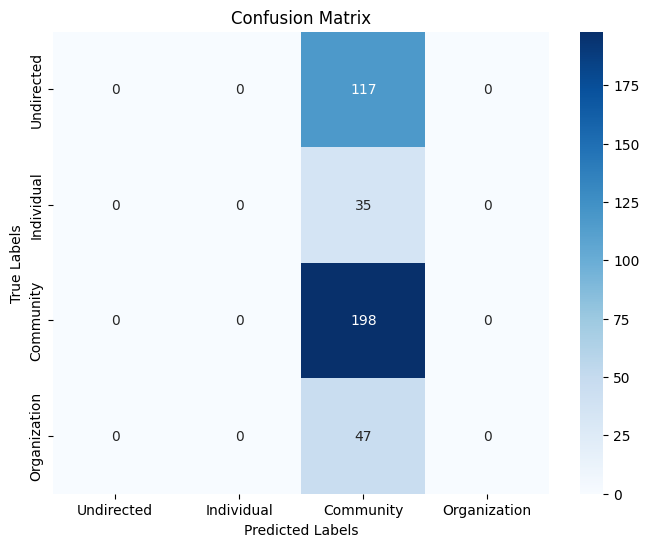

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a DataFrame named test_df with columns: 'text', 'label', and 'predictions'
y_true = test_df['labels'].values
y_pred = test_df['predictions'].values

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ['Undirected' , 'Individual', 'Community','Organization']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.show()

I have to Execute from hereeee ------------

In [1]:
testdf['label'] = predictions_test
testdf['index'] = testdf['index'].str.split('subtaskB/').str[-1]
testdf['index'] = testdf['index'].str.split('.jpg').str[0]

NameError: name 'predictions_test' is not defined

In [ ]:
print(testdf)

In [ ]:
testdf = testdf.drop("index", axis=1)
testdf = testdf.drop("text", axis=1)
print(testdf)

In [ ]:
import json

# Assuming you have a DataFrame named df
# df with columns 'index' and 'label'

# Create a list to store the dictionaries
data = []

# Iterate over the DataFrame rows
for _, row in testdf.iterrows():
    data.append({"index": row['index'], "prediction": row['label']})

# Save the list of dictionaries as a JSON file
with open('submission.json', 'w') as json_file:
    for item in data:
        json_file.write(json.dumps(item) + "\n")